In [2]:
#Run me beforehand, only necessary once
!pip install pytransit
!pip install pyrr
!pip install emcee
!pip install celerite
!pip install corner


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.0 MB/s eta 0:00:00a 0:00:01
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pytransit import QuadraticModel

s_per_day=24*3600.
M_sun=1.989e33 #g
R_sun=6.955e10 #cm
G=6.673e-8 #cm^3/g*s^2

/apps/jupyter/6.5.2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
period=4.931 #insert your period here in days

##### DO NOT ALTER THIS. This snippet of code calculates the time array you should use to generate your lightcurves, 
#both from scratch and using exisiting python packages
M_star_low=0.1
M_star_high=10.0

R_high=((M_star_high)**0.57)*R_sun #MR scaling relations for MS stars
R_low=((M_star_low)**0.8)*R_sun

a_high=(((period*s_per_day)**2.0*G*M_star_high*M_sun)/(4*np.pi**2.0))**(1.0/3.0)
a_low=(((period*s_per_day)**2.0*G*M_star_low*M_sun)/(4*np.pi**2.0))**(1.0/3.0)

duration_high=period*s_per_day/np.pi*(R_high/a_high)
duration_low=period*s_per_day/np.pi*(R_low/a_low)

#Calculating number of 1 min exoposure needed for a 3 hour duration window, 
#if eccentricity is as high as 0.9 and planet transits at apastron
n_high=3*duration_high*(np.sqrt(1-0.9**2)/(1-0.9))/60.
n_low=3*duration_low*(np.sqrt(1-0.9**2)/(1-0.9))/60.

single_transit_time_array=(np.arange(0,n_high)-n_high/2.0)/(60*24) #Short time array in days, centered on a single transit event

#Use the time array below to eventually produce the time array for your lightcurve
time_array=np.concatenate(((np.arange(0,n_high)-n_high/2.0)/(60*24),(np.arange(0,n_high)-n_high/2.0)/(60*24.0)+period)) 
time_array=np.concatenate((time_array,(np.arange(0,n_high)-n_high/2.0)/(60*24)+period*2.0)) #Long time array in days, which will include three transit events

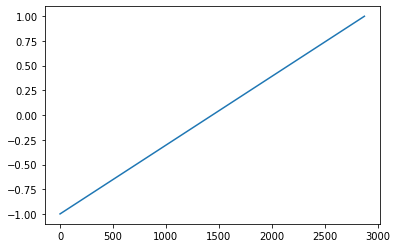

In [5]:
plt.plot(single_transit_time_array)

In [7]:
#Generate a transit lightcurve using PyTransit. Transit parameters are specified below
#This generates both a single transit lightcurve, using the shorter time array, and a lightcurve with three transits, using the longer time array

tm = QuadraticModel()
tm.set_data(single_transit_time_array) #time needs to be specified in days

t0=0
i=np.pi*89.57/180 #90 degrees is perfectly edge-on
aonr=a_high/R_high
k= .05#R_p/R_star
period=period

single_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=0.0, p=period, a=aonr, i=i,e=0,w=0)

tm.set_data(time_array) #time needs to be specified in days
three_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=0.0, p=period, a=aonr, i=i,e=0,w=0)

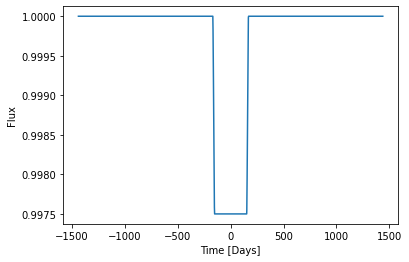

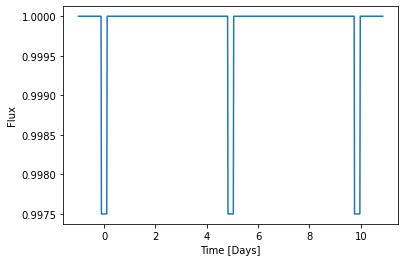

In [10]:
plt.plot(single_transit_time_array*24*60,single_transit_lightcurve)
plt.xlabel('Time [Days]')
plt.ylabel('Flux')
plt.show()

plt.plot(time_array,three_transit_lightcurve)
plt.xlabel('Time [Days]')
plt.ylabel('Flux')
plt.show()


In [ ]:
#Code for writing your transit lightcurve to a CSV file

import csv 
from numpy import savetxt
from numpy import loadtxt

test_time_array=time_array     #Time array including three transits

noise=np.zeros(len(time_array))  #Replace with an array of actual Gaussian noise
test_flux_array=three_transit_lightcurve+noise #Flux array from PyTransit, including three transits, with noise on top

test_error_array=np.zeros(len(time_array)) 
test_error_array.fill(0.0) #Replace 0.0 with your random error value
    
test_rows=np.transpose([test_time_array,test_flux_array,test_error_array])

#The line below writes your time, flux, and error arrays to a CSV file
#EDIT THE STELLAR MASS AND STELLAR RADIUS IN THE FILENAME TO YOUR OWN VALUES
savetxt('stellar_mass_1.0_stellar_radius_1.0.csv', test_rows, delimiter=',') #replace stellar mass and radius in filename with your values

In [ ]:
#Reading in the data again from the array we just wrote, to confirm it wrote properly
data = loadtxt('stellar_mass_1.0_stellar_radius_1.0.csv', delimiter=',')
print(np.shape(data))
read_in_time=data[:,0]
read_in_flux=data[:,1]
read_in_error=data[:,2]

(52647, 3)


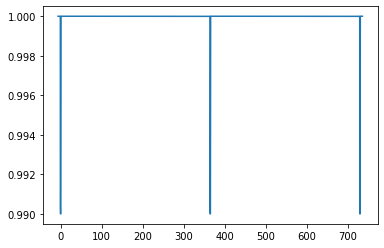

In [ ]:
plt.plot(read_in_time,read_in_flux)